In [ ]:
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:

import zipfile
import os


climate_data = pd.read_excel('/content/climate_data.xlsx')

crop_production_data = pd.read_csv('/content/Crops_data_en_11-7-2024.csv')

fertilizer_data = pd.read_csv('/content/Fertilizers_FAOSTAT_data_en_12-3-2022.csv')

emissions_data = pd.read_csv('/content/Emissions_FAOSTAT_data_en_12-3-2022.csv')







In [ ]:
print("Climate Data:")
print(climate_data.head(), "\n")

print("Crop Production Data:")
print(crop_production_data.head(), "\n")

print("Fertilizer Data:")
print(fertilizer_data.head(), "\n")

print("Emissions Data:")
print(emissions_data.head(), "\n")

print("\nClimate Data Info:")
print(climate_data.info())

print("\nCrop Production Data Info:")
print(crop_production_data.info())

print("\nFertilizer Data Info:")
print(fertilizer_data.info())

print("\nEmissions Data Info:")
print(emissions_data.info())


Climate Data:
   Year       pr    tas   tnn    txx
0  1961  1175.75  24.13  7.12  39.83
1  1962  1117.62  24.10  7.10  39.73
2  1963  1185.62  23.91  6.58  39.55
3  1964  1150.77  23.85  6.90  39.52
4  1965  1111.10  23.96  6.91  39.59 

Crop Production Data:
  Domain Code                        Domain  Area Code (M49)   Area  \
0         QCL  Crops and livestock products              356  India   
1         QCL  Crops and livestock products              356  India   
2         QCL  Crops and livestock products              356  India   
3         QCL  Crops and livestock products              356  India   
4         QCL  Crops and livestock products              356  India   

   Element Code         Element  Item Code (CPC)      Item  Year Code  Year  \
0          5312  Area harvested             1510  Potatoes       1961  1961   
1          5412           Yield             1510  Potatoes       1961  1961   
2          5510      Production             1510  Potatoes       1961  1961 

In [ ]:
climate_data = climate_data[['Year', 'pr', 'tas', 'tnn', 'txx']]

area_harvested_data = crop_production_data[crop_production_data['Element'] == 'Area harvested']
yield_data = crop_production_data[crop_production_data['Element'] == 'Yield']

area_harvested_data = area_harvested_data[['Year', 'Value']].rename(columns={'Value': 'Area Harvested'})
yield_data = yield_data[['Year', 'Value']].rename(columns={'Value': 'Yield'})

crop_data = pd.merge(area_harvested_data, yield_data, on='Year', how='inner')

fertilizer_data = fertilizer_data[['Year', 'Value']].rename(columns={'Value': 'Fertilizer Usage'})

xemissions_data = emissions_data[['Year', 'Value']].rename(columns={'Value': 'Emissions'})


# Display the processed datasets to verify
print("Climate Data:\n", climate_data.head())
print("\nCrop Data (with Yield and Area Harvested):\n", crop_data.head())
print("\nFertilizer Data:\n", fertilizer_data.head())
print("\nEmissions Data:\n", emissions_data.head())


Climate Data:
    Year       pr    tas   tnn    txx
0  1961  1175.75  24.13  7.12  39.83
1  1962  1117.62  24.10  7.10  39.73
2  1963  1185.62  23.91  6.58  39.55
3  1964  1150.77  23.85  6.90  39.52
4  1965  1111.10  23.96  6.91  39.59

Crop Data (with Yield and Area Harvested):
    Year  Area Harvested   Yield
0  1961        375000.0  7250.7
1  1962        365000.0  6704.1
2  1963        413000.0  8147.7
3  1964        415000.0  6248.2
4  1965        429000.0  8403.3

Fertilizer Data:
    Year  Fertilizer Usage
0  1961              1.55
1  1962              2.05
2  1963              2.33
3  1964              3.42
4  1965              3.54

Emissions Data:
    Year  Emissions
0  1961    27.8120
1  1961     6.2577
2  1961    34.0697
3  1961  9028.4589
4  1961  9028.4589


In [ ]:
emissions_data = emissions_data.groupby('Year', as_index=False).mean()

print("Aggregated Emissions Data:\n", emissions_data.head())

Aggregated Emissions Data:
    Year     Emissions
0  1961  23925.351461
1  1962  23933.809431
2  1963  23914.302958
3  1964  24213.143803
4  1965  24013.413492


In [ ]:
merged_data = pd.merge(crop_data, climate_data, on='Year', how='inner')
merged_data = pd.merge(merged_data, fertilizer_data, on='Year', how='inner')
merged_data = pd.merge(merged_data, emissions_data, on='Year', how='inner')

# Display the final merged data
print("\nFinal Merged Data:\n", merged_data.head())



Final Merged Data:
    Year  Area Harvested   Yield       pr    tas   tnn    txx  \
0  1961        375000.0  7250.7  1175.75  24.13  7.12  39.83   
1  1961        375000.0  7250.7  1175.75  24.13  7.12  39.83   
2  1961        375000.0  7250.7  1175.75  24.13  7.12  39.83   
3  1962        365000.0  6704.1  1117.62  24.10  7.10  39.73   
4  1962        365000.0  6704.1  1117.62  24.10  7.10  39.73   

   Fertilizer Usage     Emissions  
0              1.55  23925.351461  
1              0.38  23925.351461  
2              0.17  23925.351461  
3              2.05  23933.809431  
4              0.51  23933.809431  


In [ ]:

merged_data = merged_data.groupby('Year', as_index=False).mean()

xprint("Cleaned Final Merged Data:\n", merged_data.head())


Cleaned Final Merged Data:
    Year  Area Harvested   Yield       pr    tas   tnn    txx  \
0  1961        375000.0  7250.7  1175.75  24.13  7.12  39.83   
1  1962        365000.0  6704.1  1117.62  24.10  7.10  39.73   
2  1963        413000.0  8147.7  1185.62  23.91  6.58  39.55   
3  1964        415000.0  6248.2  1150.77  23.85  6.90  39.52   
4  1965        429000.0  8403.3  1111.10  23.96  6.91  39.59   

   Fertilizer Usage     Emissions  
0          0.700000  23925.351461  
1          0.926667  23933.809431  
2          1.120000  23914.302958  
3          1.590000  24213.143803  
4          1.613333  24013.413492  


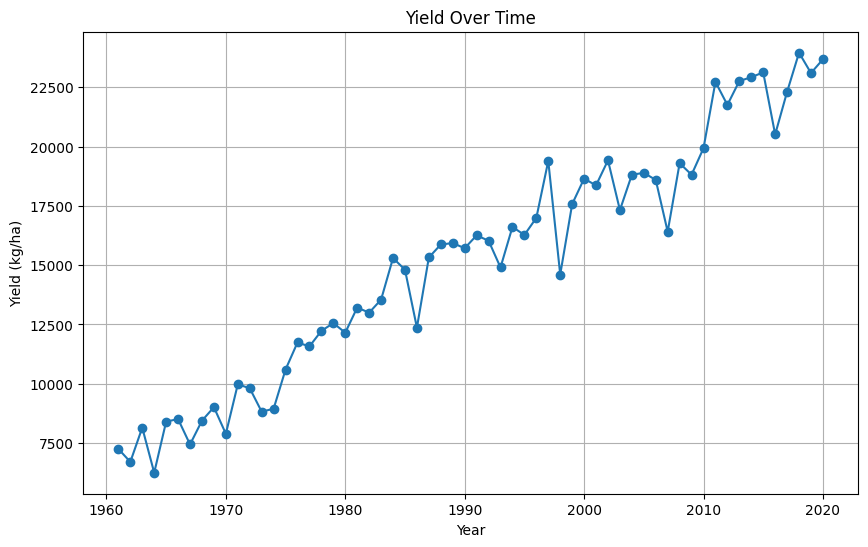

In [ ]:
# Plot Yield over time
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Year'], merged_data['Yield'], marker='o')
plt.title('Yield Over Time')
plt.xlabel('Year')
plt.ylabel('Yield (kg/ha)')
plt.grid()
plt.show()


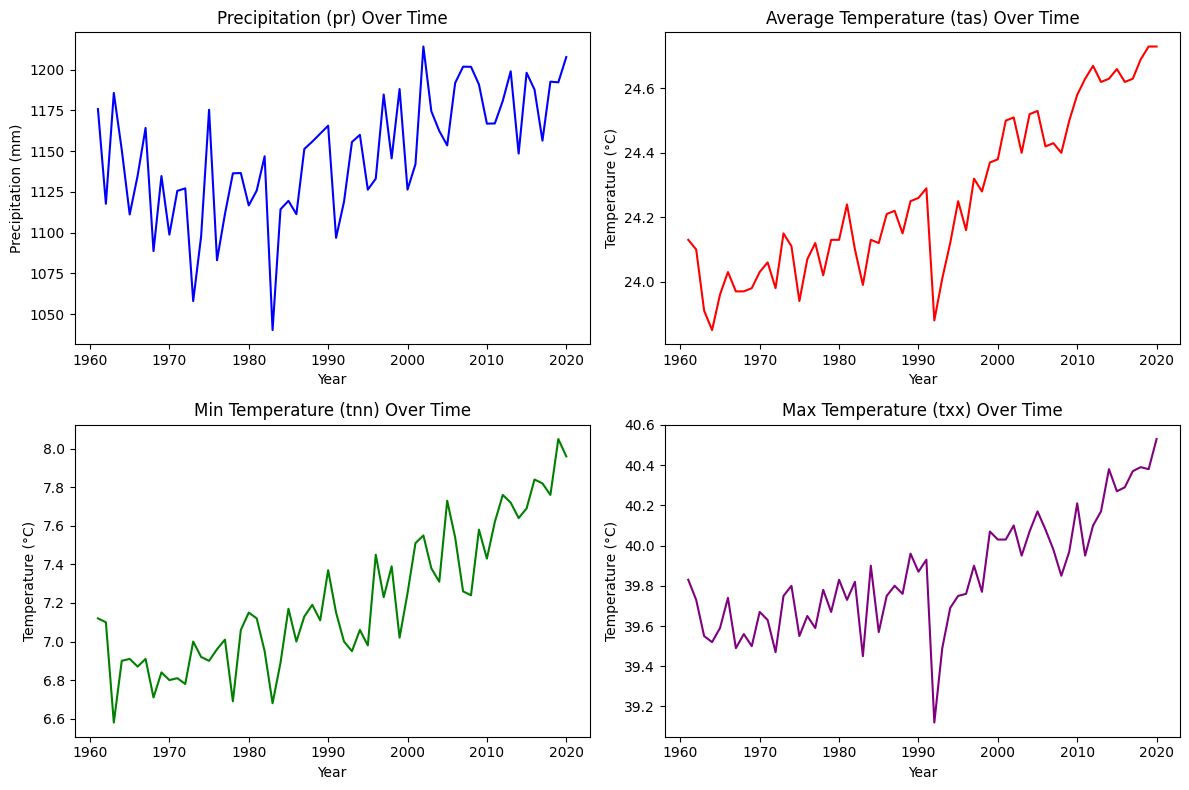

In [ ]:
# Plot climate variables over time
plt.figure(figsize=(12, 8))

# Precipitation
plt.subplot(2, 2, 1)
plt.plot(merged_data['Year'], merged_data['pr'], color='blue')
plt.title('Precipitation (pr) Over Time')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')

# Average Temperature
plt.subplot(2, 2, 2)
plt.plot(merged_data['Year'], merged_data['tas'], color='red')
plt.title('Average Temperature (tas) Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')

# Min Temperature
plt.subplot(2, 2, 3)
plt.plot(merged_data['Year'], merged_data['tnn'], color='green')
plt.title('Min Temperature (tnn) Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')

# Max Temperature
plt.subplot(2, 2, 4)
plt.plot(merged_data['Year'], merged_data['txx'], color='purple')
plt.title('Max Temperature (txx) Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()


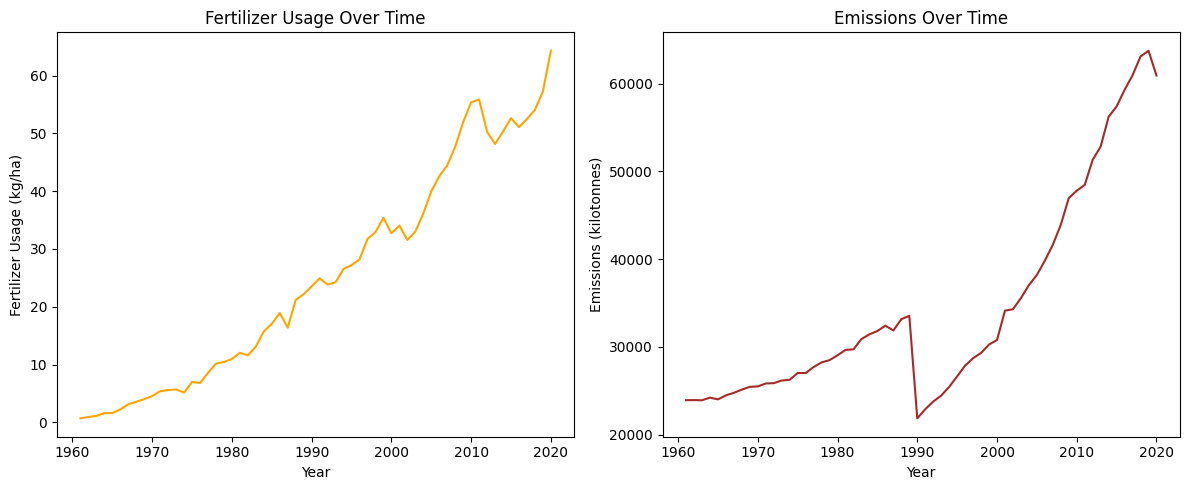

In [ ]:
# Plot Fertilizer Usage and Emissions over time
plt.figure(figsize=(12, 5))

# Fertilizer Usage
plt.subplot(1, 2, 1)
plt.plot(merged_data['Year'], merged_data['Fertilizer Usage'], color='orange')
plt.title('Fertilizer Usage Over Time')
plt.xlabel('Year')
plt.ylabel('Fertilizer Usage (kg/ha)')

# Emissions
plt.subplot(1, 2, 2)
plt.plot(merged_data['Year'], merged_data['Emissions'], color='brown')
plt.title('Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Emissions (kilotonnes)')

plt.tight_layout()
plt.show()


In [ ]:
correlation_matrix = merged_data.corr()

print("Correlation with Yield:\n", correlation_matrix['Yield'])


Correlation with Yield:
 Year                0.975546
Area Harvested      0.942592
Yield               1.000000
pr                  0.569191
tas                 0.892623
tnn                 0.847277
txx                 0.780541
Fertilizer Usage    0.952050
Emissions           0.816841
Name: Yield, dtype: float64


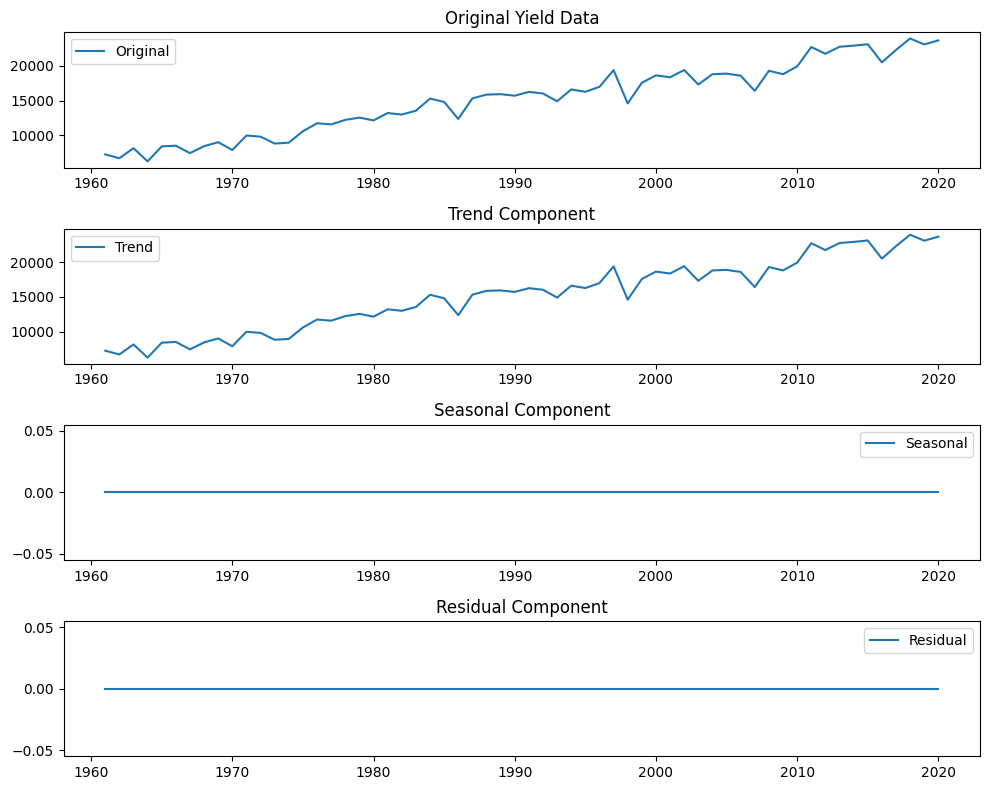

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(merged_data['Yield'], model='additive', period=1)

# Plot
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(merged_data['Year'], merged_data['Yield'], label='Original')
plt.title('Original Yield Data')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(merged_data['Year'], result.trend, label='Trend')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(merged_data['Year'], result.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(merged_data['Year'], result.resid, label='Residual')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()


                               SARIMAX Results                                
Dep. Variable:                  Yield   No. Observations:                   55
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -465.687
Date:                Thu, 07 Nov 2024   AIC                            937.373
Time:                        19:58:06   BIC                            943.340
Sample:                             0   HQIC                           939.675
                                 - 55                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1824      0.303     -0.603      0.547      -0.775       0.411
ma.L1         -0.2522      0.307     -0.823      0.411      -0.853       0.349
sigma2      1.816e+06   3.68e+05      4.937      0.0

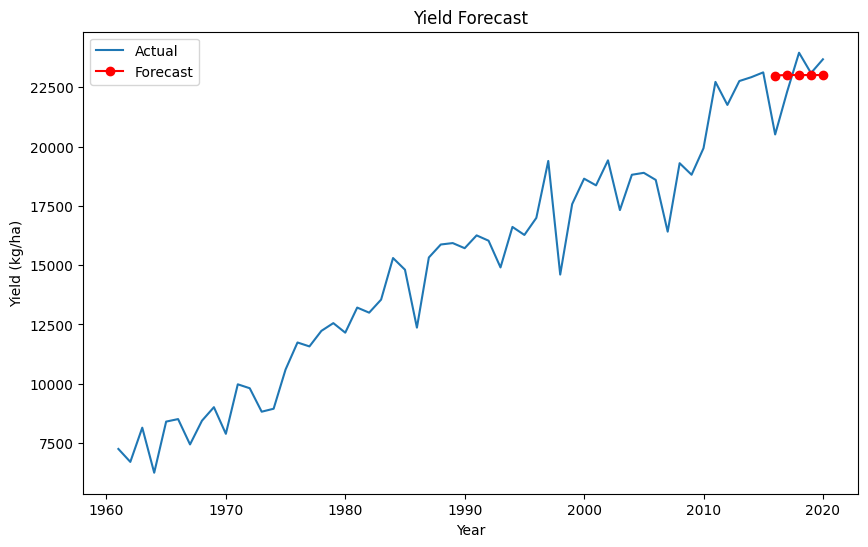

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

train = merged_data['Yield'][:-5]
test = merged_data['Yield'][-5:]

model = ARIMA(train, order=(1, 1, 1))


print(model_fit.summary())


forecast = model_fit.forecast(steps=5)
print("\nForecasted Values:")
print(forecast)


plt.figure(figsize=(10, 6))
plt.plot(merged_data['Year'], merged_data['Yield'], label='Actual')
plt.plot(merged_data['Year'][-5:], forecast, label='Forecast', color='red', marker='o')
plt.title('Yield Forecast')
plt.xlabel('Year')
plt.ylabel('Yield (kg/ha)')
plt.legend()
plt.show()


In [ ]:
!pip install prophet
from prophet import Prophet

prophet_data = merged_data[['Year', 'Yield']].copy()
prophet_data.columns = ['ds', 'y']


In [ ]:

model = Prophet()


model.fit(prophet_data)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp68k8_lu_/nspq1jjh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp68k8_lu_/zlaldwej.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5262', 'data', 'file=/tmp/tmp68k8_lu_/nspq1jjh.json', 'init=/tmp/tmp68k8_lu_/zlaldwej.json', 'output', 'file=/tmp/tmp68k8_lu_/prophet_modeldh2mqre5/prophet_model-20241107200141.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:01:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:01:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


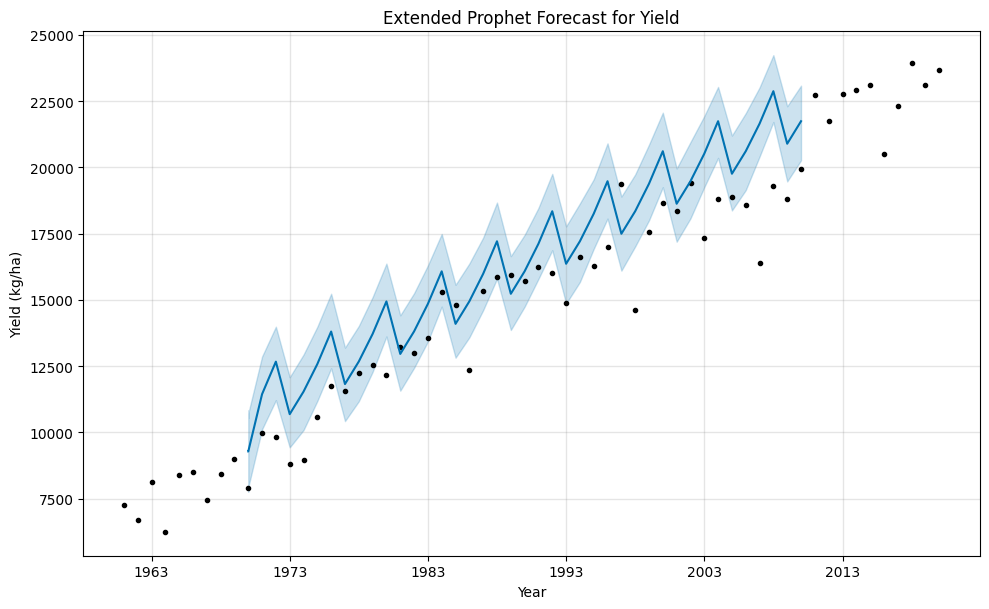

In [ ]:

future = model.make_future_dataframe(periods=40, freq='Y')


forecast = model.predict(future)

fig = model.plot(forecast)
plt.title("Extended Prophet Forecast for Yield")
plt.xlabel("Year")
plt.ylabel("Yield (kg/ha)")
plt.show()
